# #Part IV -- Clustering

In [167]:
# Importing required modules-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import copy
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score, adjusted_rand_score, confusion_matrix, silhouette_samples

In [126]:
# Reading the cleaned data-set after Preprocess-I
data=pd.read_csv("D:\DMDW project\scripts\Cleaned_data.csv")

In [127]:
data.head()

,name,generation,is_legendary,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,1,0,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,1,0,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,1,0,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega,1,0,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,Charmander,1,0,Fire,Normal,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0


In [128]:
# Clustering with KMeans
model = KMeans(max_iter=1000, random_state=36)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
features = ['hp','attack','defense','sp_attack','sp_defense','speed']

hp


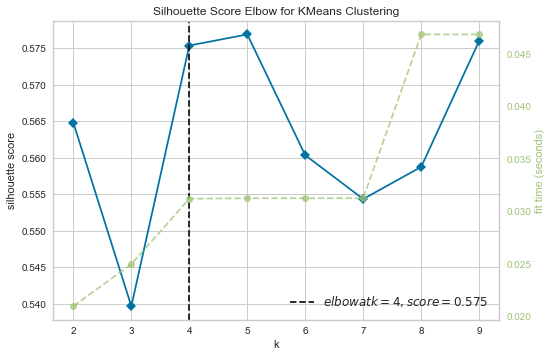

attack


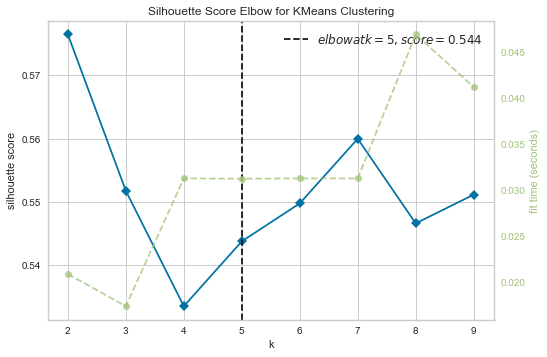

defense


C:\Users\KIRA\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\KIRA\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


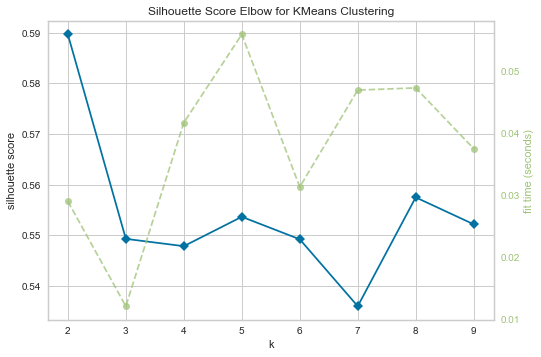

sp_attack


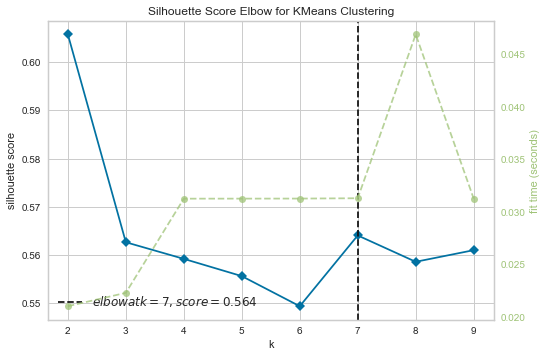

sp_defense


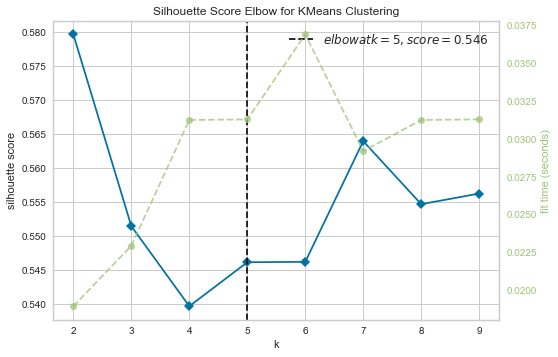

speed


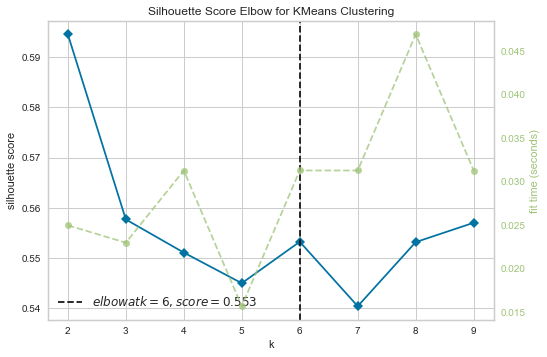

In [129]:
# plotting for each feature-
for x in features:
    visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
    visualizer.fit(data[x].values.reshape(-1,1))    # Fit the data to the visualizer
    print(x)
    visualizer.poof()    # Draw/show/poof the data

# #CLUSTERING BY BINNING

In [130]:
# based on the graphs above, choosing the optimal number of clusters for each stats.
num_bins = [7,9,7,5,9,9]
bins_required = {x:num_bins[i] for i, x in enumerate(features)}
X = data[features].values
model_kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=36)
data['kmeans_group'] = model_kmeans.fit_predict(X)

In [131]:
#clustering by binning and finding the cluster centers through K-means
bins_stats = {}
stats_cluster_centers = {}
for x in features:
    model_stats = KMeans(n_clusters=bins_required[x], random_state=36)
    bins_stats[x] = model_stats.fit_predict(data[x].values.reshape(-1,1))
    stats_cluster_centers[x] = model_stats.cluster_centers_

In [132]:
#Reapplying the labels in ordered form
stats_relabel = {}
for x in features:
    df1 = pd.DataFrame({x:stats_cluster_centers[x].flatten()})
    df1['ordered_label'] = df1.rank().astype(int)
    print('\n',df1.set_index('ordered_label').sort_index())
    stats_relabel[x] = df1.ordered_label.to_dict()


                        hp
ordered_label            
1               35.200000
2               49.725118
3               64.667832
4               78.420000
5               98.317919
6              134.612903
7              226.800000

                    attack
ordered_label            
1               24.654545
2               41.132653
3               54.598802
4               67.226667
5               80.292398
6               95.256410
7              109.583333
8              127.600000
9              159.525000

                   defense
ordered_label            
1               36.933702
2               54.668161
3               69.890909
4               87.000000
5              108.292857
6              137.120690
7              202.500000

                 sp_attack
ordered_label            
1               35.665323
2               59.847059
3               87.703846
4              117.681481
5              155.255814

                sp_defense
ordered_label            
1 

In [133]:
#showing each labeled bins with their cluster number for each stats
stats_relabel

{'hp': {0: 3, 1: 5, 2: 2, 3: 7, 4: 6, 5: 1, 6: 4},
 'attack': {0: 4, 1: 7, 2: 2, 3: 9, 4: 5, 5: 8, 6: 6, 7: 1, 8: 3},
 'defense': {0: 2, 1: 5, 2: 6, 3: 1, 4: 4, 5: 3, 6: 7},
 'sp_attack': {0: 2, 1: 4, 2: 3, 3: 1, 4: 5},
 'sp_defense': {0: 6, 1: 3, 2: 4, 3: 1, 4: 8, 5: 5, 6: 7, 7: 2, 8: 9},
 'speed': {0: 2, 1: 6, 2: 4, 3: 9, 4: 8, 5: 5, 6: 7, 7: 3, 8: 1}}

In [134]:
#determining the number of labels in each bin for each feature
temp = pd.DataFrame(bins_stats)
for x in features:
    temp[x] = temp[x].map(lambda y: stats_relabel[x][y])
    
temp.head()

,hp,attack,defense,sp_attack,sp_defense,speed
0,2,3,2,2,4,3
1,3,4,3,3,5,4
2,4,5,4,3,6,5
3,4,6,6,4,7,5
4,1,3,1,2,3,4


In [135]:
#optional analysis -- counting the each cluster items for various feature
for x in features:
    print('\n',temp[x].value_counts().sort_index())
X3=temp


 1    120
2    211
3    286
4    200
5    173
6     31
7      5
Name: hp, dtype: int64

 1     55
2     98
3    167
4    150
5    171
6    156
7     84
8    105
9     40
Name: attack, dtype: int64

 1    181
2    223
3    220
4    194
5    140
6     58
7     10
Name: defense, dtype: int64

 1    248
2    340
3    260
4    135
5     43
Name: sp_attack, dtype: int64

 1     79
2    122
3    218
4    206
5    183
6    136
7     58
8     22
9      2
Name: sp_defense, dtype: int64

 1     45
2    123
3    186
4    180
5    154
6    111
7    123
8     82
9     22
Name: speed, dtype: int64


# #VISUALIZING

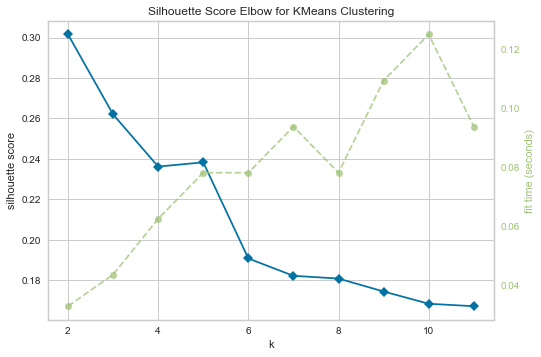

In [166]:
#visualizing the clusters and variation
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(X3)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

# #CLUSTERING THROUGH BINS WITH 5 CLUSTERS

In [137]:
#prediciting the common variations in the bins for each features and relabeling them

model_kmeans_bins_km = KMeans(n_clusters=5, max_iter=1000, random_state=36)
data['kmeans_kmbin_group'] = model_kmeans_bins_km.fit_predict(X3)
cluster_center_bins_km = pd.DataFrame(model_kmeans_bins_km.cluster_centers_)
cluster_center_bins_km.columns = features
cluster_center_bins_km['total'] = cluster_center_bins_km.sum(axis=1)
cluster_center_bins_km['ordered_label'] = cluster_center_bins_km.total.rank().astype(int)
cluster_center_bins_km.sort_values(by='ordered_label').set_index('ordered_label')

,hp,attack,defense,sp_attack,sp_defense,speed,total
ordered_label,,,,,,,
1,2.018349,2.935780,1.807339,1.516820,2.394495,3.250765,13.923547
2,3.574074,3.981481,4.203704,2.888889,5.876543,3.456790,23.981481
3,3.196891,4.658031,2.611399,2.787565,4.145078,6.839378,24.238342
4,3.961326,6.674033,4.027624,2.309392,3.928177,3.624309,24.524862
5,4.374233,7.478528,4.147239,3.331288,5.435583,6.877301,31.644172


In [138]:
#finding the cluster centers and applying labels to each cluster center
cluster_center = pd.DataFrame(model_kmeans.cluster_centers_)
cluster_center.columns = features
cluster_center['total'] = cluster_center.sum(axis=1)
cluster_center['ordered_label'] = cluster_center.total.rank().astype(int)
cluster_center.sort_values(by='ordered_label').set_index('ordered_label')

,hp,attack,defense,sp_attack,sp_defense,speed,total
ordered_label,,,,,,,
1,49.080357,53.773810,50.633929,46.502976,47.755952,49.351190,297.098214
2,69.977273,82.304545,63.900000,79.613636,70.386364,95.336364,461.518182
3,78.534591,66.226415,92.056604,86.798742,101.490566,53.163522,478.270440
4,81.253086,109.981481,104.506173,59.154321,73.067901,59.345679,487.308642
5,91.778523,118.395973,91.483221,121.040268,96.342282,98.046980,617.087248


In [139]:
#reapplying the labels by mapping it to dictionary
relabel_bins_km = cluster_center_bins_km.ordered_label.to_dict()
data.kmeans_kmbin_group = data.kmeans_kmbin_group.map(lambda x: relabel_bins_km[x])
relabel = cluster_center.ordered_label.to_dict()
data.kmeans_group = data.kmeans_group.map(lambda x: relabel[x])

In [140]:
#getting count of each bins by clustering
data.kmeans_kmbin_group.value_counts().sort_index()

1    327
2    162
3    193
4    181
5    163
Name: kmeans_kmbin_group, dtype: int64

In [141]:
#printing the info score and random score between the bins
print(adjusted_mutual_info_score(data['kmeans_kmbin_group'], data['kmeans_group']))
print(adjusted_rand_score(data['kmeans_kmbin_group'], data['kmeans_group']))

0.6321417575281585
0.7054390987912426


In [142]:
# Confusion matrix--
confusion_matrix(data['kmeans_kmbin_group'], data['kmeans_group'])

array([[318,   5,   3,   1,   0],
       [  4,   4, 140,   9,   5],
       [  4, 167,   2,   5,  15],
       [ 10,  26,  11, 121,  13],
       [  0,  18,   3,  26, 116]], dtype=int64)

In [143]:
# function {build_cluster} to cluster each attribute with different bin size of 3 -
def build_cluster(X, n_clust=3):
    
    model = KMeans(n_clusters=n_clust, max_iter=1000, random_state=42)
    data['kmeans_{}_group'.format(n_clust)] = model.fit_predict(X)

    cluster_center_df = pd.DataFrame(model.cluster_centers_)
    cluster_center_df.columns = features
    cluster_center_df['total'] = cluster_center_df.sum(axis=1)
    cluster_center_df['ordered_label'] = cluster_center_df.total.rank().astype(int)
    relabel = cluster_center_df.ordered_label.to_dict()
    data['kmeans_{}_group'.format(n_clust)] = data['kmeans_{}_group'.format(n_clust)].map(lambda x: relabel[x])
    return cluster_center_df.sort_values(by='ordered_label').set_index('ordered_label')
build_cluster(X)

,hp,attack,defense,sp_attack,sp_defense,speed,total
ordered_label,,,,,,,
1,52.928922,56.017157,52.125000,50.245098,51.169118,53.279412,315.764706
2,79.555556,95.860215,103.702509,67.831541,85.161290,56.215054,488.326165
3,80.884956,96.056047,76.899705,103.640118,86.203540,96.784661,540.469027


In [144]:
#callibrating each bins for accurate clustering
result = {}
for n_clust in [10, 13, 15, 17, 19]:
    result[n_clust] = build_cluster(X, n_clust=n_clust)

In [145]:
#foramtting each cluster by grouping them by K-means
for n_clust in [10, 13, 15, 17, 19]:
    data['silhouette_{}'.format(n_clust)] = silhouette_samples(X, data['kmeans_{}_group'.format(n_clust)])

In [146]:
#result of 9 group clustered bins
data.groupby('kmeans_10_group').silhouette_10.mean()

kmeans_10_group
1     0.197873
2     0.163112
3     0.228997
4     0.144982
5     0.065025
6     0.133158
7     0.205726
8     0.139829
9     0.144543
10    0.122283
Name: silhouette_10, dtype: float64

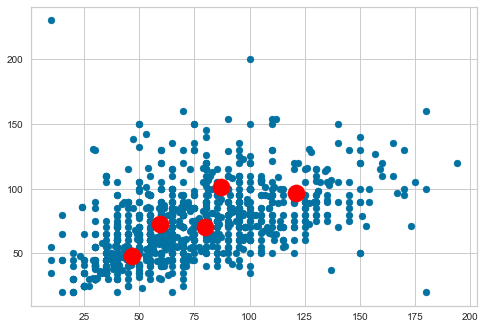

In [147]:
plt.scatter(X[:,3], X[:,4])
plt.scatter(model_kmeans.cluster_centers_[:, 3], model_kmeans.cluster_centers_[:, 4], s=300, c='red')
plt.show()

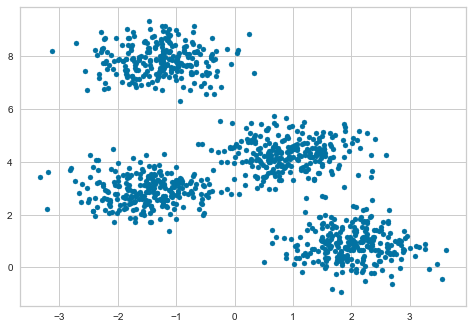

In [148]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1026, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=25);

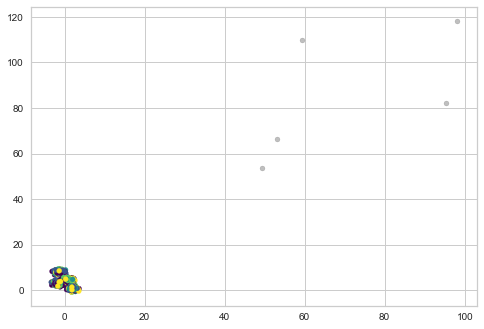

In [149]:
plt.scatter(X[:, 0], X[:, 1], c=data['kmeans_group'] , s=25, cmap='viridis')

centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 5], centers[:, 1], c='black', s=25, alpha=0.25);

# #USER INPUT ANALYSIS

In [151]:
#Analysing the clusters through user defined inputs
data.loc[data.kmeans_15_group==9,['name','silhouette_15']].sort_values(by='silhouette_15')

,name,silhouette_15
211,Lanturn,-0.248837
181,Snorlax,-0.114598
526,Munchlax,-0.101658
378,Wailmer,-0.044971
834,Zygarde,0.039780
53,Wigglytuff,0.061119
691,Alomomola,0.076601
504,Drifblim,0.088161
379,Wailord,0.226192
925,Guzzlord,0.291280
